In [332]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
from ipywidgets import interactive
import ipywidgets as widgets
from ipywidgets import fixed
from numpy import linalg as LA
import pandas as pd
import datetime
from scipy.interpolate import UnivariateSpline
from tqdm import tqdm

## Part 0 ##

In this part we read in the data and scale some columns.


In [333]:
data = pd.read_csv('berkeley_azi_alt.csv', delimiter = ' ')

In [334]:
data

,time,sun_a_azi,sun_a_alt,sun_b_azi,sun_b_alt,moon_azi,moon_alt
0,0,210.3047,48.3867,210.3047,48.3871,30.3047,-48.9794
1,1000,215.8795,46.5747,215.8578,46.5935,35.7530,-47.2948
2,2000,221.0699,44.5101,221.0315,44.5493,40.8457,-45.3705
3,3000,225.8873,42.2270,225.8364,42.2880,45.5901,-43.2371
4,4000,230.3553,39.7568,230.2954,39.8405,50.0050,-40.9230
...,...,...,...,...,...,...,...
315356,315356000,165.5126,55.9819,184.0000,52.1938,232.8500,12.1685
315357,315357000,172.9150,56.6068,190.7356,51.7736,235.7127,9.5961
315358,315358000,180.4756,56.8033,197.2919,50.9764,238.4674,6.9366
315359,315359000,188.0278,56.5638,203.5788,49.8250,241.1250,4.1995


In [335]:
n = len(data)
print(n)
t_arr = np.zeros(n,)
azi_arr_a = np.zeros(n,)
alt_arr_a = np.zeros(n,)
azi_arr_b = np.zeros(n,)
alt_arr_b = np.zeros(n,)
azi_arr_m = np.zeros(n,)
alt_arr_m = np.zeros(n,)

315361


In [336]:
t = np.array(data['time'])

azi_arr_a = np.array(data['sun_a_azi'])
alt_arr_a = np.array(data['sun_a_alt'])

azi_arr_b = np.array(data['sun_b_azi'])
alt_arr_b = np.array(data['sun_b_alt'])

azi_arr_m = np.array(data['moon_azi'])
alt_arr_m = np.array(data['moon_alt'])

In [337]:
t_arr = np.copy(t)
t_arr = t_arr/1e7

### Part 1 ###

In this part we study moon.

In [338]:
N = int(n/4)

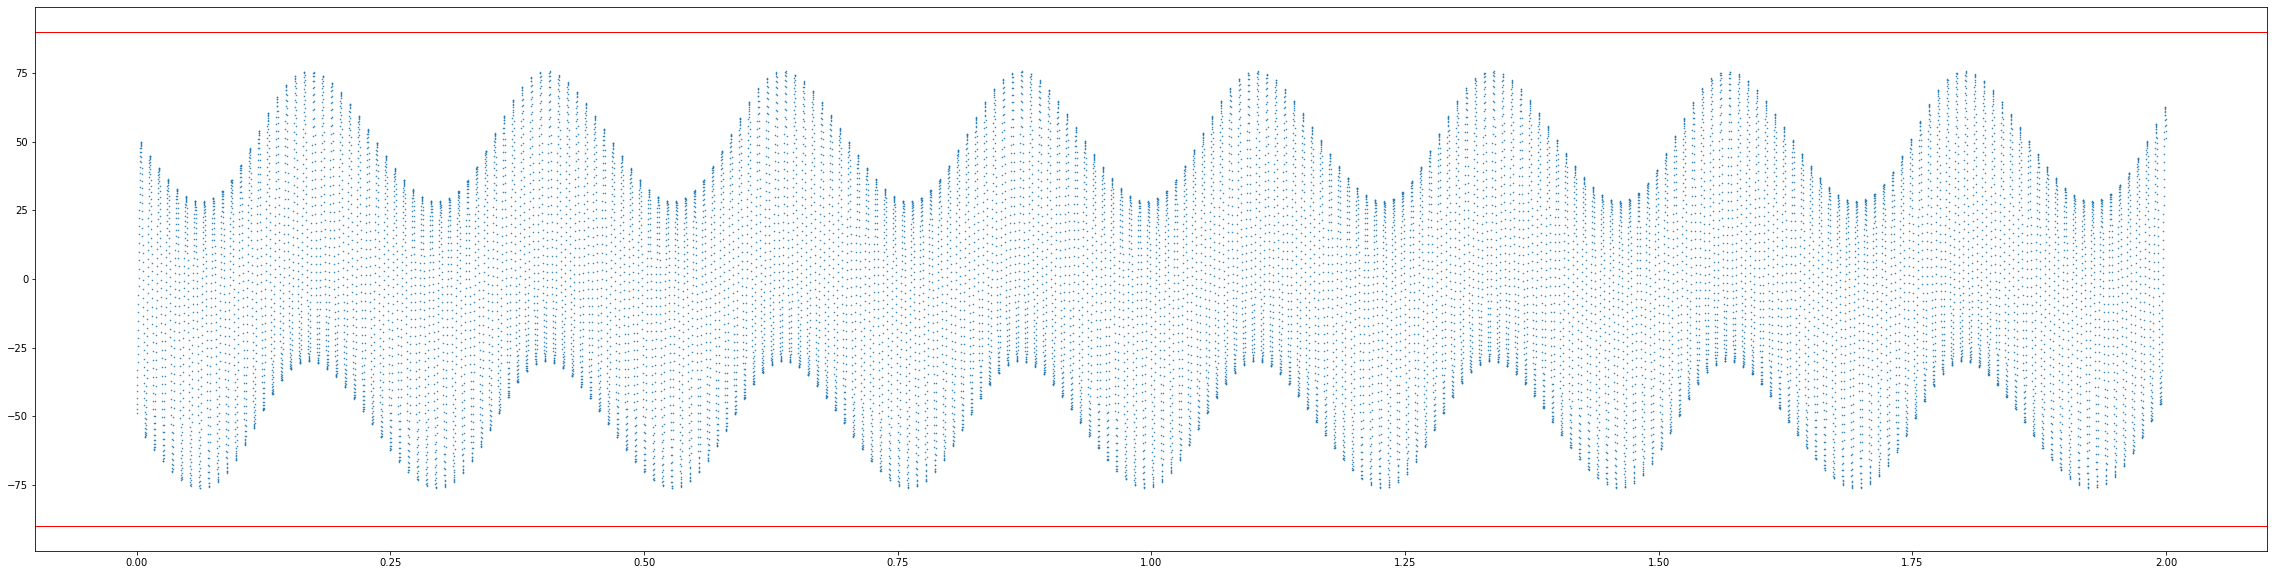

In [339]:
plt.figure(figsize=(40, 10))
plt.plot(t_arr[:20000], alt_arr_m[:20000], '.-', linewidth=0.03, markersize=1)
plt.axhline(y=90, c='r', linewidth=1)
plt.axhline(y=-90, c='r', linewidth=1)

In [385]:
X_train_alt_m, X_test_alt_m, y_train_alt_m, y_test_alt_m = train_test_split(t_arr[:20000], alt_arr_m[:20000], test_size=0.2, random_state=42)

In [386]:
period_earth_self = 24*60*60 / 1e7
period_earth_moon  = 27.02*24*60*60 / 1e7
w1 = 2*np.pi / period_earth_self
w2 = 2*np.pi / period_earth_moon
print(w1, w2)

727.220521664304 26.91415698239467


In [387]:
w1 = 702
w2 = 27.13

In [388]:
print(w1, w2)

702 27.13


In [389]:
def features(X, w1, w2):
    n   = len(X)
    phi = np.zeros((n, 4))
    
    phi[:,0] = np.sin(w1 * X)
    phi[:,1] = np.cos(w1 * X)
    phi[:,2] = np.sin(w2 * X)
    phi[:,3] = np.cos(w2 * X)
    
    return phi

In [390]:
phi_train_alt_m = features(X_train_alt_m, w1, w2)
phi_test_alt_m  = features(X_test_alt_m, w1, w2)

In [391]:
poly = PolynomialFeatures(3)
phi_train_alt_m = poly.fit_transform(phi_train_alt_m)
phi_test_alt_m = poly.fit_transform(phi_test_alt_m)

In [392]:
LR = Ridge(alpha=0)
LR.fit(phi_train_alt_m, y_train_alt_m)
y_test_pred_alt_m = LR.predict(phi_test_alt_m)
y_train_pred_alt_m = LR.predict(phi_train_alt_m)
loss_test_alt_m = np.mean((y_test_pred_alt_m - y_test_alt_m) **2)
loss_train_alt_m = np.mean((y_train_pred_alt_m - y_train_alt_m) **2)
print(loss_train_alt_m, loss_test_alt_m)
LR.coef_

28.977264480580548 27.592550236941033


array([ 2.78656883e+14,  9.34042625e+14, -6.08238342e+13,  2.18282652e+14,
        3.25513662e+13, -2.21166024e+14,  8.02420982e-02,  4.75770246e+00,
       -2.41163802e+00, -2.21166024e+14,  3.62442626e+00, -1.85801283e+00,
       -6.44425436e+13,  1.25536370e+00, -6.44425436e+13, -4.67054784e+14,
       -1.09388083e+13, -3.64590111e+14,  2.04292724e+14, -4.67054784e+14,
        7.67566018e+00, -1.32221141e+00, -4.66987842e+14,  3.06763827e+00,
       -4.66987842e+14, -1.09388083e+13, -3.64590111e+14,  2.04292724e+14,
        7.17626424e+13,  1.45043638e+00,  7.17626424e+13,  1.46307458e+14,
       -2.36844090e+14,  1.46307458e+14, -2.36844090e+14])

Text(0.5, 0, 'Time(s) divided by 1e7')

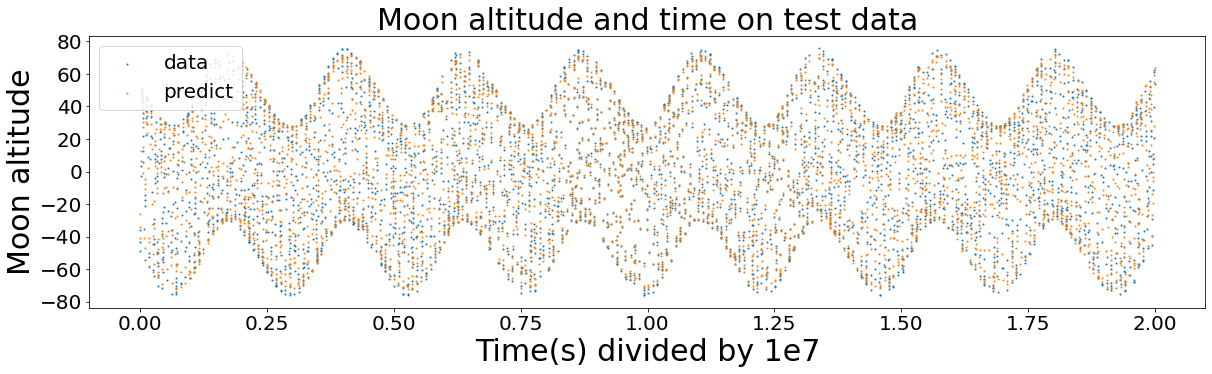

In [395]:
plt.figure(figsize=(20,5))
plt.title('Moon altitude and time on test data',fontsize = 30)
plt.scatter(X_test_alt_m, y_test_alt_m, label = 'data', s=1)
plt.scatter(X_test_alt_m, y_test_pred_alt_m,  label = 'predict', s=1)
plt.legend(fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Moon altitude',fontsize = 30)
plt.xlabel('Time(s) divided by 1e7',fontsize = 30)



### Part 2 ###

In this part we study the two suns.

In [209]:
N = int(n/4)

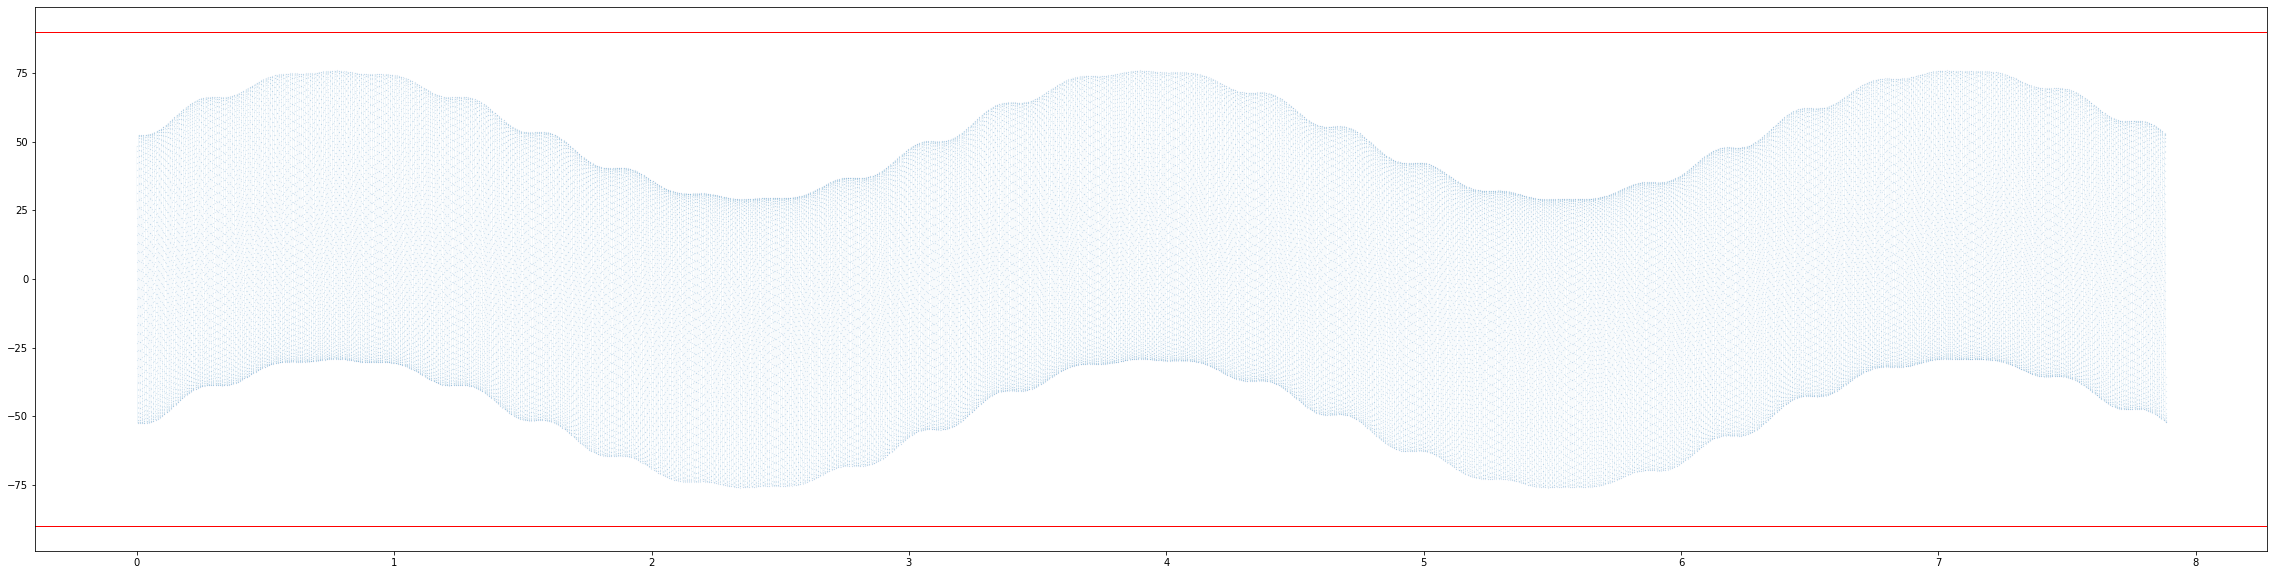

In [210]:
plt.figure(figsize=(40, 10))
plt.plot(t_arr[:N], alt_arr_a[:N], '.-', linewidth=0.03, markersize=0.1)
plt.axhline(y=90, c='r', linewidth=1)
plt.axhline(y=-90, c='r', linewidth=1)

In [211]:
X_train_alt_a, X_test_alt_a, y_train_alt_a, y_test_alt_a = train_test_split(t_arr, alt_arr_a, test_size=0.2, random_state=42)

In [212]:
threshold = 65
copy_times = 3
X_train_alt_a_add = []
y_train_alt_a_add = []
for i in range(len(X_train_alt_a)):
    if abs(y_train_alt_a[i]) > 65:
        for j in range(copy_times):
            X_train_alt_a_add.append(X_train_alt_a[i])
            y_train_alt_a_add.append(y_train_alt_a[i])
X_train_alt_a = np.concatenate((X_train_alt_a, X_train_alt_a_add))
y_train_alt_a = np.concatenate((y_train_alt_a, y_train_alt_a_add))

In [213]:
# For sun, set the function as f(x) = A1 sin(w1x + c1) + A2 sin(w2x + c2) + B
# Here we set the initial value for gradient decent
period_earth_self = 24*60*60 / 1e7
period_earth_sun  = 365*24*60*60 / 1e7
w1 = 2*np.pi / period_earth_self
w2 = 2*np.pi / period_earth_sun
print(w1, w2)

727.220521664304 1.9923849908611069


In [214]:
print(w1, w2)

727.220521664304 1.9923849908611069


In [215]:
phi_train_alt_a = features(X_train_alt_a, w1, w2)
phi_test_alt_a  = features(X_test_alt_a, w1, w2)

In [216]:
poly = PolynomialFeatures(3)
phi_train_alt_a = poly.fit_transform(phi_train_alt_a)
phi_test_alt_a = poly.fit_transform(phi_test_alt_a)

In [217]:
LR = Ridge(alpha=0)
LR.fit(phi_train_alt_a, y_train_alt_a)
y_test_pred_alt_a = LR.predict(phi_test_alt_a)
y_train_pred_alt_a = LR.predict(phi_train_alt_a)
loss_test_alt_a = np.mean((y_test_pred_alt_a - y_test_alt_a) **2)
loss_train_alt_a = np.mean((y_train_pred_alt_a - y_train_alt_a) **2)
print(loss_train_alt_a, loss_test_alt_a)
LR.coef_

8.558462842033968 9.41703472579666


array([ 4.67051927e+13,  8.03237387e+12,  4.91209609e+13,  4.61367463e+13,
        4.79801639e+12, -2.05030074e+12,  3.00702879e-01,  1.52719443e+00,
       -3.86362025e-01, -2.05030074e+12,  4.70539384e-01, -9.68973278e-02,
       -2.86292044e+13,  5.95059600e-01, -2.86292044e+13,  6.83775823e+12,
        1.88099219e+13,  2.40666998e+13, -6.77004932e+11,  6.83775823e+12,
       -4.96911989e+00, -4.13512946e-01, -1.48701321e+13, -4.07768383e+00,
       -1.48701321e+13,  1.88099219e+13,  2.40666998e+13, -6.77004932e+11,
       -6.79308827e+13, -1.26911528e+00, -6.79308827e+13, -7.02034461e+13,
       -4.12101145e+12, -7.02034461e+13, -4.12101145e+12])

Text(0.5, 0, 'Time(s) divided by 1e7')

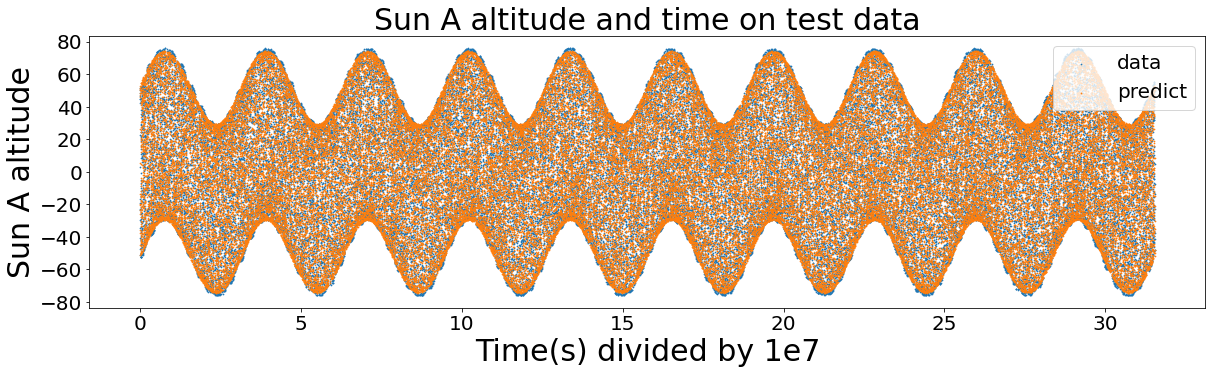

In [397]:
plt.figure(figsize=(20,5))
plt.title('Sun A altitude and time on test data',fontsize = 30)
plt.scatter(X_test_alt_a, y_test_alt_a, label = 'data', s=0.5)
plt.scatter(X_test_alt_a, y_test_pred_alt_a,  label = 'predict', s=0.5)
plt.legend(fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Sun A altitude',fontsize = 30)
plt.xlabel('Time(s) divided by 1e7',fontsize = 30)



In [ ]:
# The sun B

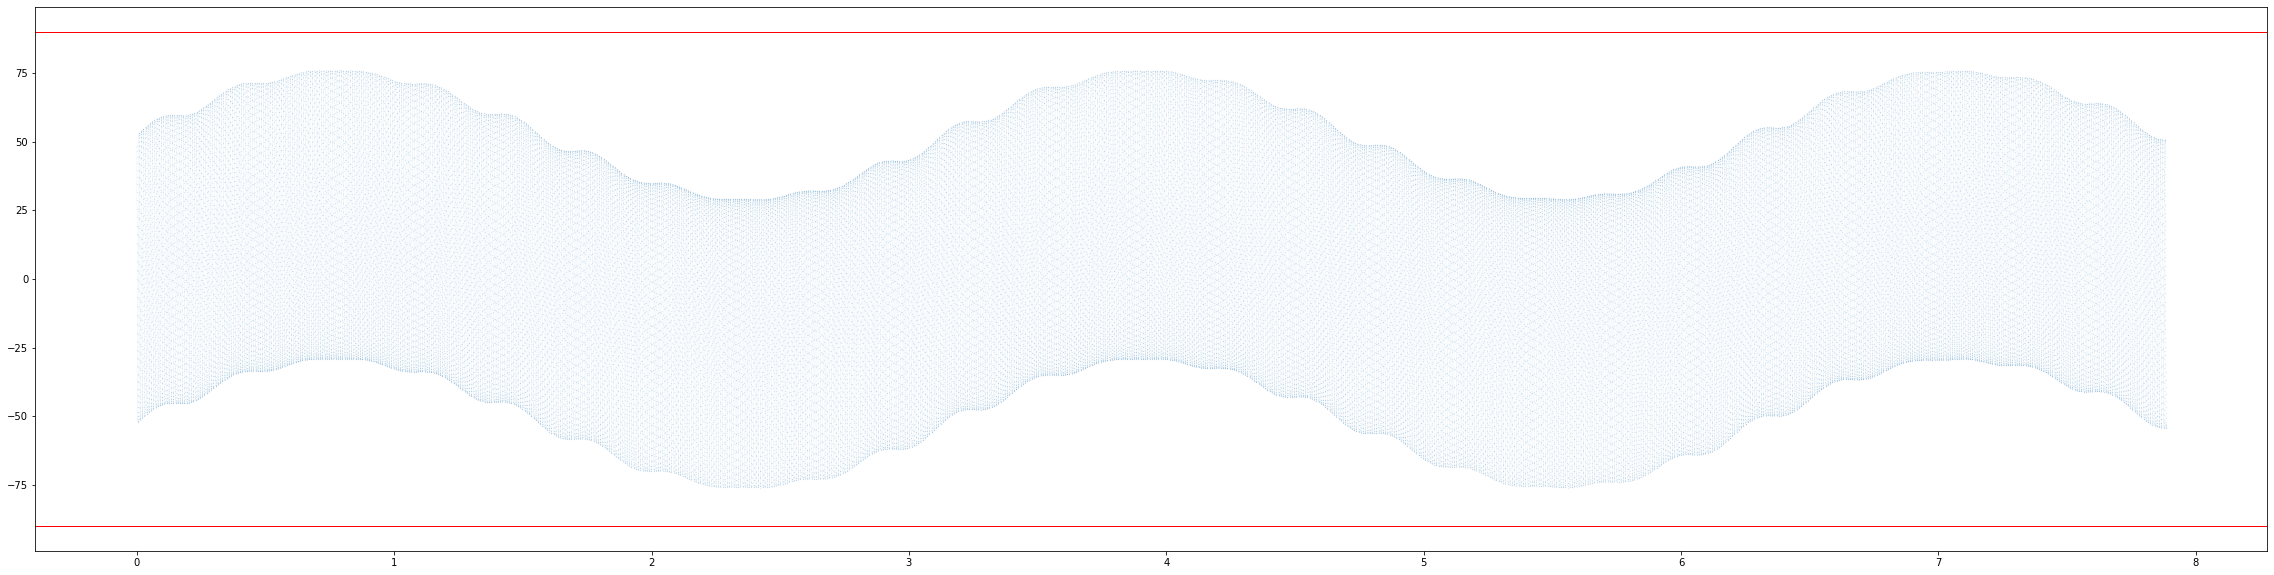

In [219]:
plt.figure(figsize=(40, 10))
plt.plot(t_arr[:N], alt_arr_b[:N], '.-', linewidth=0.03, markersize=0.1)
plt.axhline(y=90, c='r', linewidth=1)
plt.axhline(y=-90, c='r', linewidth=1)

In [220]:
X_train_alt_b, X_test_alt_b, y_train_alt_b, y_test_alt_b = train_test_split(t_arr, alt_arr_b, test_size=0.2, random_state=42)

In [221]:
threshold = 65
copy_times = 3
X_train_alt_b_add = []
y_train_alt_b_add = []
for i in range(len(X_train_alt_b)):
    if abs(y_train_alt_b[i]) > 65:
        for j in range(copy_times):
            X_train_alt_b_add.append(X_train_alt_b[i])
            y_train_alt_b_add.append(y_train_alt_b[i])
X_train_alt_b = np.concatenate((X_train_alt_b, X_train_alt_b_add))
y_train_alt_b = np.concatenate((y_train_alt_b, y_train_alt_b_add))

In [222]:
# For sun, set the function as f(x) = A1 sin(w1x + c1) + A2 sin(w2x + c2) + B
# Here we set the initial value for gradient decent
period_earth_self = 24*60*60 / 1e7
period_earth_sun  = 365*24*60*60 / 1e7
w1 = 2*np.pi / period_earth_self
w2 = 2*np.pi / period_earth_sun
print(w1, w2)

727.220521664304 1.9923849908611069


In [223]:
print(w1, w2)

727.220521664304 1.9923849908611069


In [224]:
phi_train_alt_b = features(X_train_alt_b, w1, w2)
phi_test_alt_b  = features(X_test_alt_b, w1, w2)

In [225]:
poly = PolynomialFeatures(3)
phi_train_alt_b = poly.fit_transform(phi_train_alt_b)
phi_test_alt_b = poly.fit_transform(phi_test_alt_b)

In [226]:
LR = Ridge(alpha=0)
LR.fit(phi_train_alt_b, y_train_alt_b)
y_test_pred_alt_b = LR.predict(phi_test_alt_b)
y_train_pred_alt_b = LR.predict(phi_train_alt_b)
loss_test_alt_b = np.mean((y_test_pred_alt_b - y_test_alt_b) **2)
loss_train_alt_b = np.mean((y_train_pred_alt_b - y_train_alt_b) **2)
print(loss_train_alt_b, loss_test_alt_b)
LR.coef_

8.518604433218147 9.414456037134471


array([-6.67170289e+13,  3.67385333e+12,  9.58376534e+12,  4.34614774e+13,
       -7.30874057e+13, -1.28770204e+12,  2.93556478e-01,  1.58363795e+00,
       -2.82353553e-01, -1.28770204e+12,  4.12477867e-01, -2.14357653e-02,
       -1.26521046e+13,  5.53909798e-01, -1.26521046e+13,  9.05469301e+12,
       -1.61741403e+13,  1.64870271e+13,  2.14179994e+13,  9.05469301e+12,
       -4.93156458e+00, -4.39802101e-01, -1.27285463e+13, -4.07929471e+00,
       -1.27285463e+13, -1.61741403e+13,  1.64870271e+13,  2.14179994e+13,
        6.59037492e+12, -1.25519587e+00,  6.59037492e+12, -5.99485045e+13,
        5.16694062e+13, -5.99485045e+13,  5.16694062e+13])

Text(0.5, 0, 'Time(s) divided by 1e7')

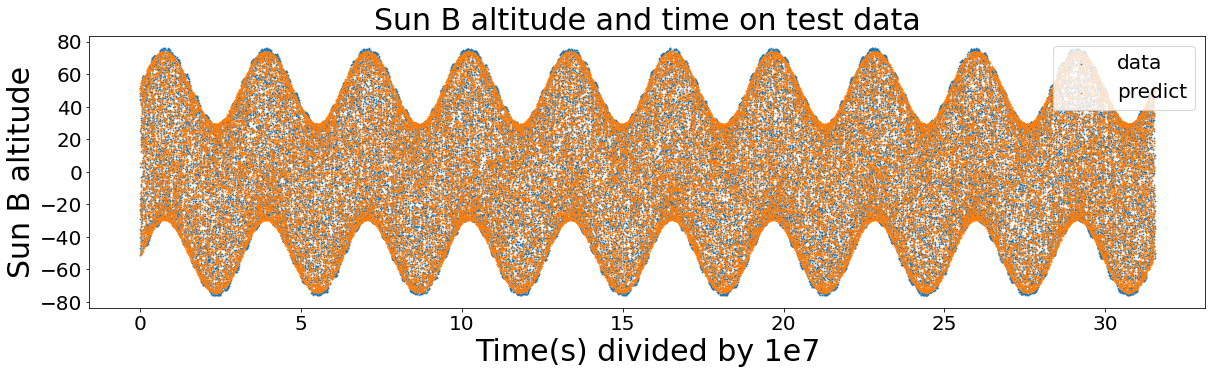

In [398]:
plt.figure(figsize=(20,5))
plt.title('Sun B altitude and time on test data',fontsize = 30)
plt.scatter(X_test_alt_b, y_test_alt_b, label = 'data', s=0.5)
plt.scatter(X_test_alt_b, y_test_pred_alt_b,  label = 'predict', s=0.5)
plt.legend(fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Sun B altitude',fontsize = 30)
plt.xlabel('Time(s) divided by 1e7',fontsize = 30)
